<h1> Unit 8 Homework</h1>
<h3> W203 Statistics for Data Science </h3>

Student Name: Youzhi Chloe Wu

Section Number: 05 - Wednesday 6:30PM

** Data: ** The file GPA1.RData contains data from a 1994 survey of MSU students.  The survey was conducted by Christopher Lemmon, a former MSU undergraduate, and provided by Wooldridge.

** Context: ** The skipped variable represents the average number of lectures each respondent skips per week.  You are interested in testing whether MSU students skip over 1 lecture per week on the average.

<h4>**1.0: ** Examine the skipped variable and argue whether or not a t-test is valid for this scenario.</h4>

In [2]:
# Preparations:
# 1. make sure the RData file is located in the working directory
# 2. control plot size
getwd()
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)

[1] "/Users/cati/Documents/Study/UCB/W203-Statistics_for_Data_Science/HomeWork/unit_8"

age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,⋯,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
21,0,0,1,0,0,0,1,0,3.0,⋯,0,1,1,0,0,2,1.0,1,0,0
21,0,0,1,0,0,0,1,0,3.4,⋯,0,1,0,1,1,0,1.0,1,1,1
20,0,1,0,0,0,0,1,0,3.0,⋯,0,1,1,0,1,0,1.0,1,1,1
19,1,0,0,0,1,1,1,0,3.5,⋯,0,0,1,0,0,0,0.0,0,0,0
20,0,1,0,0,0,0,1,0,3.6,⋯,0,1,1,1,0,0,1.5,1,1,0
20,0,0,1,0,1,1,1,0,3.0,⋯,0,1,1,0,0,0,0.0,0,1,0


[1] "age"      "soph"     "junior"   "senior"   "senior5"  "male"    
 [7] "campus"   "business" "engineer" "colGPA"   "hsGPA"    "ACT"     
[13] "job19"    "job20"    "drive"    "bike"     "walk"     "voluntr" 
[19] "PC"       "greek"    "car"      "siblings" "bgfriend" "clubs"   
[25] "skipped"  "alcohol"  "gradMI"   "fathcoll" "mothcoll"

[1] "# of observations of skipped variable:  141"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.076   2.000   5.000 

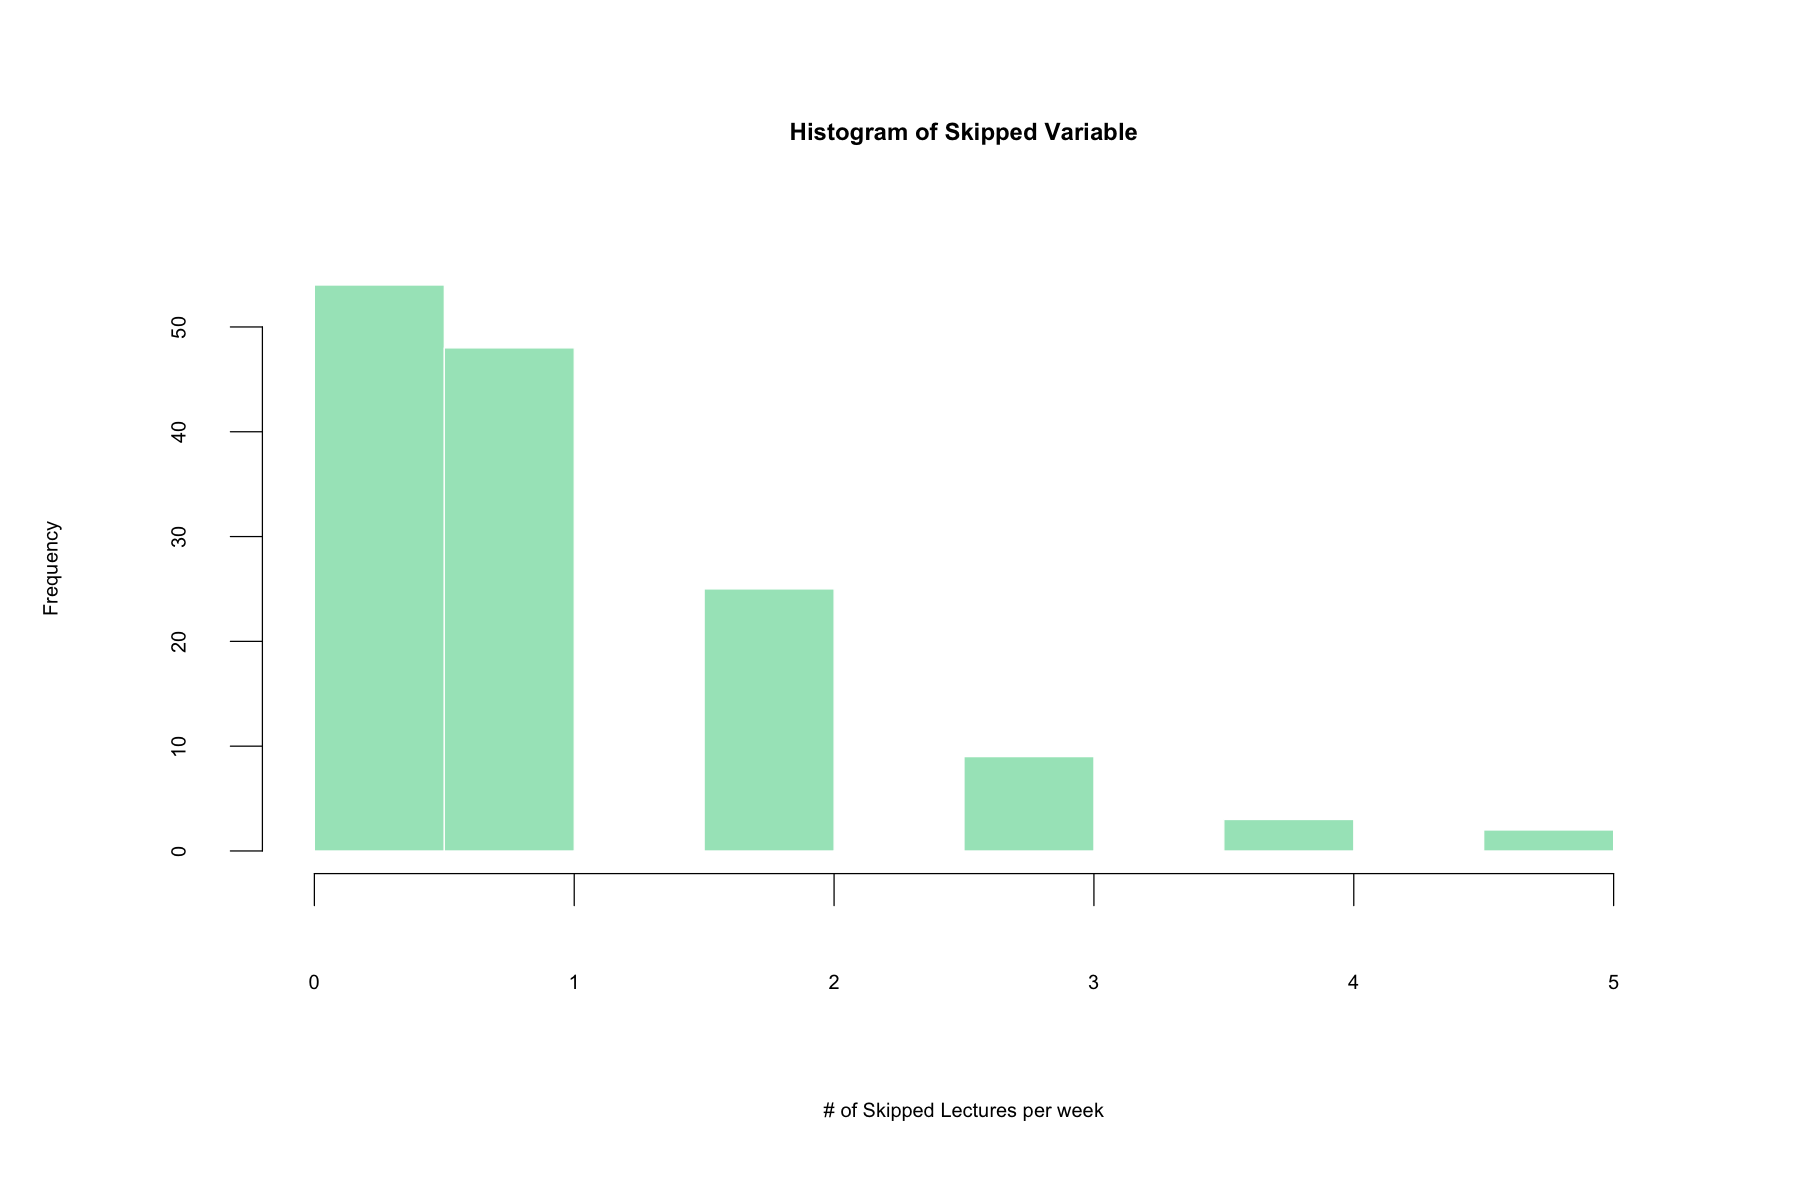

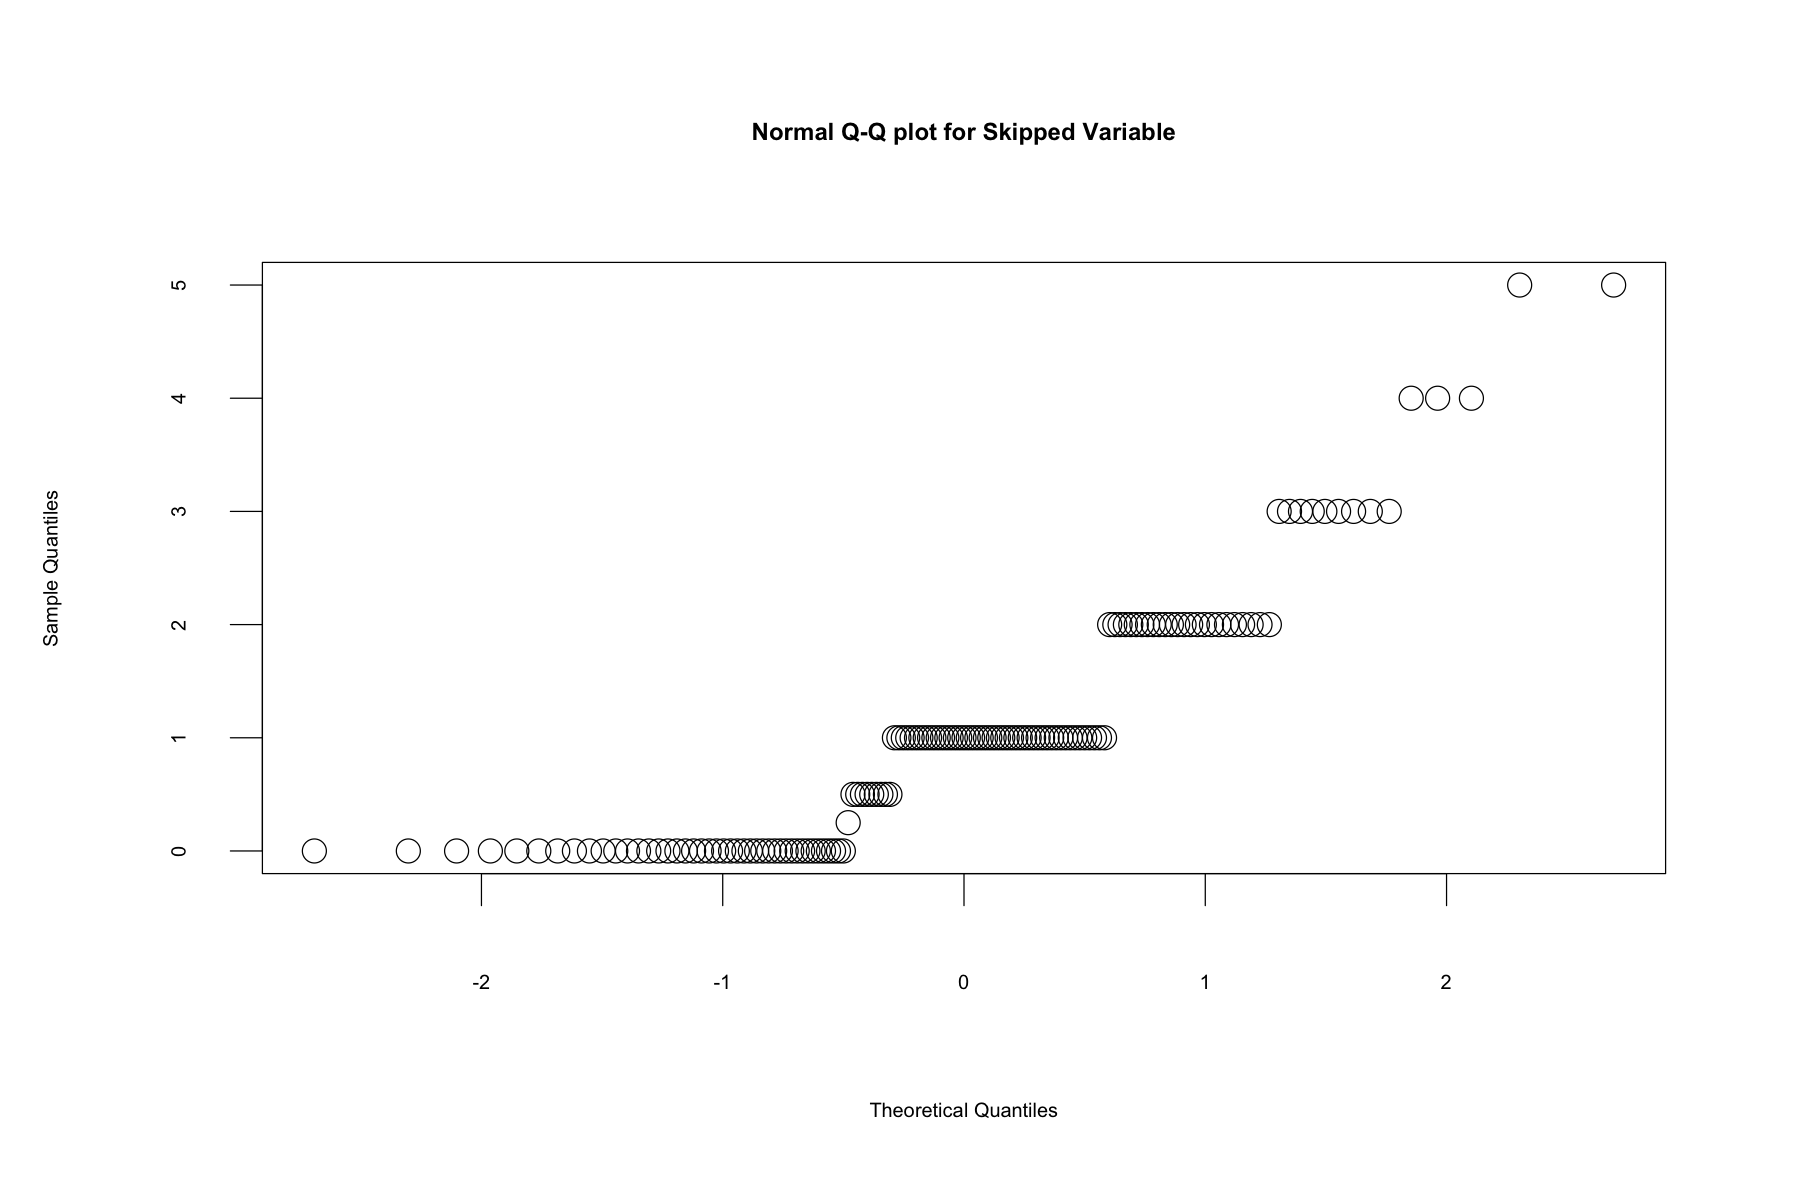

In [13]:
# loading gpa1.RData file and check on its variables
gpa <- get(load("gpa1.RData"))
head(gpa)
names(gpa)

# check on the # of observations, n, for skipped variable
paste("# of observations of skipped variable: ", length(gpa$skipped))

# check basic information on gpa$skipped variable
summary(gpa$skipped)

# exam the distribution of the skipped variables from this sample
# by plotting histogram
hist(gpa$skipped, col=rgb(0.2,0.8,0.5,0.5), 
     border='white', main= "Histogram of Skipped Variable",
     xlab="# of Skipped Lectures per week")

# pull up a qq-plot to see how normal this variable looks
qqnorm(gpa$skipped, main = "Normal Q-Q plot for Skipped Variable")

> Conclusion: I think a t-test is valid in this scenario with the following reasons:
* Although the population distribution of skipped variable is unknown, the number of observations is 141, which is sufficiently large according to CLT. It is safe to assume that the sample mean distribution approximates standard normal distribution. 
$$ \frac{ \overline{X}_n - \mu}{\sqrt{\frac{s^2}{n}}} \;\; \text{ is approximately distributed } \;\; t^{(n-1)} $$
* Although the distribution is still quite skewed. With n increases, it may become more normal. 
* By examing the QQ plot of skipped variable, it shows certain degree of diagonal line on the qq-plot. 
* The # of skipped lectures is credibly i.i.d. 

<h4> **2.0: ** How would your answer to part a change if Mr. Lemmon selected dormitory rooms at random, then interviewed all occupants in the rooms he selected?</h4>

> In this scenario, t test may not be valid. Mainly because:
* the # of skipped lectures may not be i.i.d.
* the # of people in each dormitory room may not be the same. The probability of each person being selected for interview therefore is not the same.  
* the skipped variable may have some relation with the interviewees' dormitory rooms. It is quite possible that interviewees from the same room tend to affect each other in skipping lectures. 

<h4> **3.0: ** Provide an argument for why you should choose a 2-tailed test in this instance, even if you are hoping to demonstrate that MSU students skip more than 1 lecture per week.</h4>

> * From the histogram of skipped variable in question #1, we can see that there are large amount of students in the sample skipped less than 1 lecture per week. We do not know if MSU students skipped more or less than 1 lecture per week. Even though we are interested in demonstrating they skip more than 1 lecture per week, the consequences of missing the effect in the untested direction (less than 1) are not negligible. Therefore, we should choose a two-tailed test. 
* The SD = 1.089, and the mean = 1.076 which is very close to 1 but less than 1 SD away from 1. Therefore it is hard to tell which direction it will go. 

In [15]:
sd(gpa$skipped)
mean(gpa$skipped)

[1] 1.088882

[1] 1.076241

<h4>**4.0: ** Conduct the t-test using the t.test function and interpret every component of the results.</h4>

In [5]:
t.test(gpa$skipped, mu = 1)


	One Sample t-test

data:  gpa$skipped
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.8949445 1.2575377
sample estimates:
mean of x 
 1.076241 


> Interpretation of t-test results:
* t value is calculated to be 0.83142;
* the degrees of freedom is 140, as our sample size is 141. 
* the p-value is 0.4072, which is more than $\alpha = 0.05$ (95% confidence level). The p value is not statistically significant to reject our null hypothesis. 
* our $H_a$ is that true mean is not equal to 1. This is a two-tailed test. 
* Based on the 95% confidence level, our confidence interval is $(0.8949445, 1.2575377)$. 
* the sample mean is calculated to be 1.076241. 

<h4>**5.0: ** Show how you would compute the t-statistic and p-value manually (without using t.test), using the pt function in R.</h4>

In [9]:
# Calculate t value based on formula
t.value = (mean(gpa$skipped) - 1) / (sd(gpa$skipped) / sqrt(length(gpa$skipped))) 

# Calculate p value using pt function in R, and multiply by 2 to make it a 2-tailed test
p.value = 2*pt(-abs(t.value), df=length(gpa$skipped)-1)
paste('the statistics value is:', t.value)
paste('the p value is:', p.value)

[1] "the statistics value is: 0.831415581558769"

[1] "the p value is: 0.407154692135781"

<h4>**6.0: ** Construct a 99% confidence interval for the mean number classes skipped by MSU students in a week.</h4>

In [12]:
paste("The 99% confidence interval is:")
paste(t.test(gpa$skipped, conf.level = 0.99)$conf.int)

[1] "The 99% confidence interval is:"

[1] "0.836774482444529" "1.31570778705902"

<h4>** 7.0: ** Can you say that there is a 99% chance the population mean falls inside your confidence interval?</h4>

> No. The population mean either is inside or outside the 99% confidence interval. It will not be inside the interval some time and outside some other time. The right interpretation of the 99% confidence interval is that:
* There is a 99% probability that our interval contains the true population mean before we look at the data. 
* If we repeat our experiment, in the long run, 99% of the computed confidence intervals will contain the true population mean.